# Exercise List 
## MAC0459 - 2019/2
### Matheus Tararam de Laurentys - 9793714


## E1)
Assuming that the decision tree does not have a maximum depth and the minimum samples required to split a node is two, then the decision tree will grow until all leaves are one single instance, of the 10million available. The average height (as some branches might have larger or lower height) is the smallest power of two that is greater than 10million, which is 24 (since 2<sup>23</sup> <10million < 2<sup>24</sup>). This happens because the amount of leaves in a given height k is 2<sup>k</sup>.

## E2)
Any node's GINI impurity is always lower than that of its parent. 

If a node has n datapoints distributed across k classes with each probability p<sub>k</sub> (sum of p<sub>i</sub> for i in [k] equals 1) and size $a_i$, then its GINI rate G is:
$$ G = \sum_{i=1}^{k}p_i * (1-p_i) \\
   G = 1 - (a_1/a_{[k]})^2 - (a_2/a_{[k]})^2 - \dots - (a_k/a_{[k]})^2
$$
Now, one of the children after the split, we have n-d instances and at most k classes with new probability p' and $d_i = a_i-a'_i$.
$$ G' = \sum_{i=1}^{k}p'_i * (1-p'_i) \\
   G' = 1 - (a'_1/(a_{[k]} - d_{[k]}))^2 - (a'_2/(a_{[k]} - d_{[k]}))^2 - \dots - (a'_k/(a_{[k]} - d_{[k]}))^2
$$
With some algebraic work $G - G' > 0$ if $d>0$:
$$
\begin{align}
    G - G' =& \sum^k_{i=1} a_i^2/a_{[k]}^2 - (a_i^2 - 2a_id_i + d_i^2)/(a_{[k]}^2 - 2a_{[k]}d_{[k]} + d_{[k]}^2) \\
    =& \sum^k_{i=1} (a_i^2*(a_{[k]}^2 - 2a_{[k]}d + d^2) - a^2_{[k]}*(a_i^2 - 2a_id_i + d_i^2))/(a_{[k]}^4 - 2a^3_{[k]}d + a^2_{[k]}d^2) \\
    =& 1/(a_{[k]}^4 - 2a^3_{[k]}d + a^2_{[k]}d^2) * \sum^k_{i=1}a_i^2*(a_{[k]}^2 - 2a_{[k]}d + d^2) - a^2_{[k]}*(a_i^2 - 2a_id_i + d_i^2) \\
    =& C * \sum^k_{i=1} a_i^2*(- 2a_{[k]}d + d^2) - a^2_{[k]}*(- 2a_id_i + d_i^2), C>0 (easy)\\
    =& C * ((- 2a_{[k]}d + d^2) * (a_1^2 + \dots + a_k^2)  - (a^2_{[k]})*(-2(a_1d_1 + \dots + a_kd_k) + (d_1^2 + \dots + d_k^2))) \\
    =& C * ((d^2 * (a_1^2 + \dots + a_k^2)  + a^2_{[k]}*(2(a_{[k]}*d)) - a^2_{[k]}*(d_1^2 + \dots + d_k^2) - 2a_{[k]}d* (a_1^2 + \dots + a_k^2) ) \\
    =& C * (2*a_{[k]}*d * (a^2_{[k]} - (a_1^2 + \dots + a_k^2)) + (d^2 * (a_1^2 + \dots + a_k^2) - a^2_{[k]}*(d_1^2 + \dots + d_k^2))\\
    \ge& C * (2*a_{[k]}*d * (a^2_{[k]} - (a_1^2 + \dots + a_k^2)) + (d^2 * (a_1^2 + \dots + a_k^2) - a^2_{[k]}*d^2) \\
    \ge& C * (2*d^2 * (a^2_{[k]} - (a_1^2 + \dots + a_k^2)) + (d^2 * ((a_1^2 + \dots + a_k^2) - a^2_{[k]})) \\
    \ge& C * (2*d^2 * (a^2_{[k]} - (a_1^2 + \dots + a_k^2)) - (d^2 * ((a^2_{[k]}) - (a_1^2 + \dots + a_k^2))) \\
    \ge& C * (d^2 * (a^2_{[k]} - (a_1^2 + \dots + a_k^2))) > 0\\
\end{align}
$$
Given 
$$
    p_i = a_i/a_{[k]} \\
    \sum_{i=1}^{k}a'_i - a_i = d \\
    a_{[k]} = \sum_{i=1}^{k}a_i \\
    d = d_{[k]}
$$

## E3)
It can be a good idea to reduce the max height of the decision tree. Decisions' trees split the result into two groups in every level, so, if a given tree is too specific, it might mean (could suggest other problems, however) that it is dividing in too many different groups.If a tree is trained in such a way, it might place samples (from other data) that are very similar (in an 'actual' same group) in different groups. Reducinng the height will make the tree less specific (less groups) and, therefore, more general, so, if the overfit was caused by the height, it will probably solve the issue.

## E4)
Underfitting in decision tree is measured by the impurity gain with each node. However, in decision trees, the euclidian distance between samples of the data does not matter for the immpurity calculation. Therefore, it should not solve the underfitting problem.

## E5)
If we take the usual time complexity for a decision tree, we know the algorithm is $O(N^2klogN)$ where N is the number of samples. Therefore, the time spent will be roughly 1143 hours since
$$
\frac{100,000,000^2\cdot\log\left(100,000,000\right)}{10,000,000^2\cdot\log\left(10,000,000\right)} = 1,142.857143
$$

## E6)
---------------
### EDA:
This dataset is composed of medical measurements, basic personal information and some profiling of habbits. I will make sure the distribution of age, gender and weight are what expected.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from enum import Enum

plt.rcParams.update({'font.size' : 30})

def barplot(df, col_name):
    name = "Distribution of " + col_name
    ax = df[col_name].value_counts().plot(kind='bar', figsize=(30,8), title=name)
def distPlot(df, col_name, limits, fun):
    name = "Distribution of " + col_name
    years = df[col_name].apply(fun)
    ax = years.plot.kde(title=name)
    ax.set_xlim(limits[0], limits[1])

In [6]:
data_raw = pd.read_csv("cardio_train.csv", sep=";")
data_test = data_raw[0 : data_raw.shape[0] : 50]

In [7]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


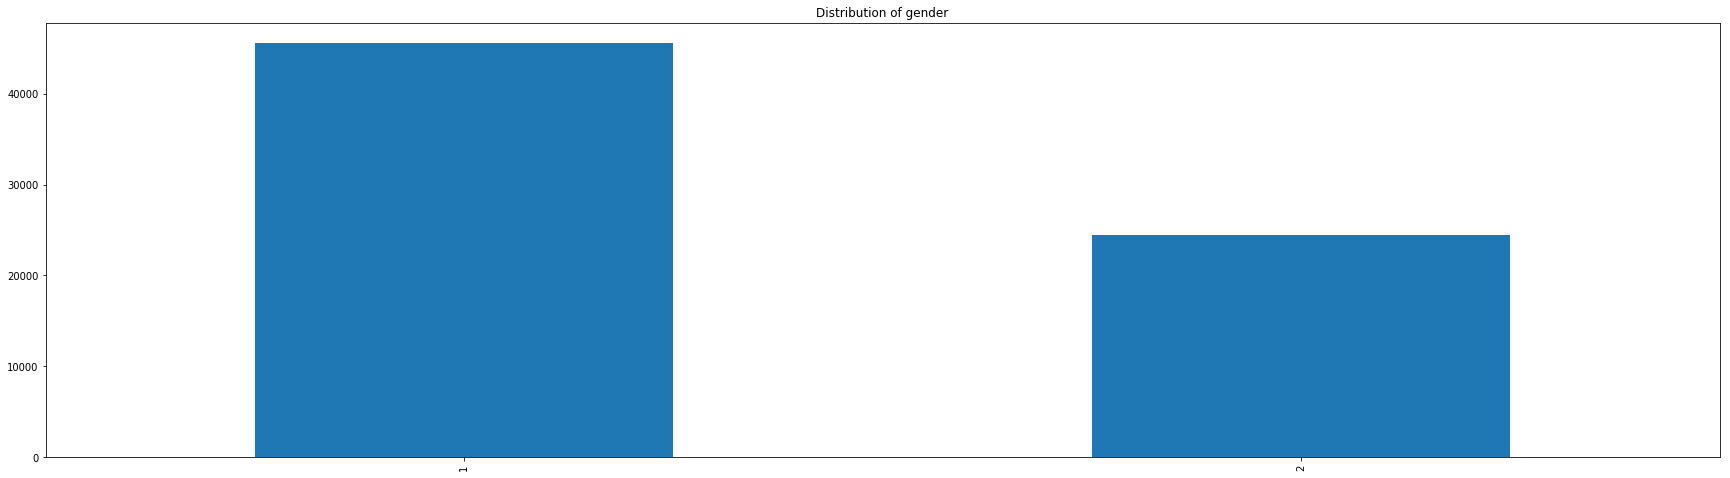

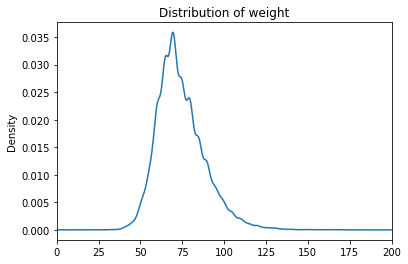

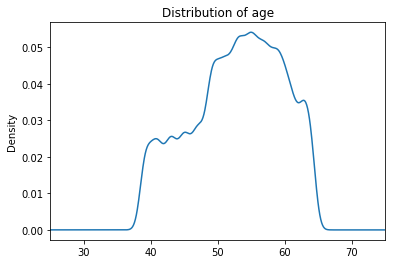

In [8]:
barplot(data_raw, 'gender')
plt.show()

distPlot(data_raw, "weight", [0, 200], lambda x: x)
plt.show()

distPlot(data_raw, "age", [25, 75], lambda x: int(x/365))
plt.show()

Since I am cannot make a good guess of what the other parameters should look like, I think refraining from analysing them is harmless. From what we see, there is a definite age range and that is expected because heart deseases do happen much more frequently at those ages. The distribution of weight seems normal as well. As of the gender, there is a clear difference, with many more women. In one side, it is weird because there should be the same number of men and women, however, women are more prone to getting treatment and have a higher life expectancy, so, in some way, this difference is accounted for.
I think the dataset does not contain abnormalities, so, for now, nothing will be filtered.

## Decision Tree

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import Image
import pydotplus

In [14]:
test_accuracy(df, depth):
    answers = df['cardio']
    data_learn = df.drop('cardio', axis=1)
    data_train, data_test, ans_train, ans_test = train_test_split(data_learn, answers)
    model = tree.DecisionTreeClassifier(max_depth=7)
    model.fit(data_train, ans_train)
    ans_predict = model.predict(data_test)
    return accuracy_score(ans_test, ans_predict)

SyntaxError: invalid syntax (<ipython-input-14-634b96e856ae>, line 1)

In [ ]:

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_pdf('tree.pdf')

In [4]:
#adding hyperparameters and checking accuracy again
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha" : np.range(4), "beta" : np.range(3), "gamma" : np.range(2)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)

NameError: name 'np' is not defined